In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d sanikamal/horses-or-humans-dataset

 99% 305M/307M [00:01<00:00, 215MB/s]
100% 307M/307M [00:01<00:00, 226MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  horses-or-humans-dataset.zip
  inflating: horse-or-human/horse-or-human/train/horses/horse01-0.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-1.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-2.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-3.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-4.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-5.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-6.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-7.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-8.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse01-9.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-0.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-1.png  
  inflating: horse-or-human/horse-or-human/train/horses/horse02-2.png  
  inflating: horse-or-hum

In [ ]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19,preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
img_size=[224,224,3]

In [ ]:
vgg=VGG19(include_top=False,
          input_shape=img_size,
          weights='imagenet')

In [ ]:
vgg.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layers in vgg.layers:
  layers.trainable=False

In [ ]:
# Flattened the last layer
x = Flatten()(vgg.output)

# Created a new layer as output
prediction = Dense( 2 , activation = 'softmax' )(x)

# Join it with the model
model = Model( inputs = vgg.input , outputs = prediction )

# Visualize the model again
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:

train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input ,
    rotation_range = 40 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    shear_range = 0.2 ,
    zoom_range = 0.2 ,
    horizontal_flip = True ,
    fill_mode = 'nearest'
)

In [ ]:

test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input ,
    rotation_range = 40 ,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    shear_range = 0.2 ,
    zoom_range = 0.2 ,
    horizontal_flip = True ,
    fill_mode = 'nearest'
)

In [ ]:
train_path = '/content/horse-or-human/train'
test_path = '/content/horse-or-human/validation'

In [ ]:
# train data
train_set = train_datagen.flow_from_directory(train_path,
                                            target_size = ( 224 , 224 ),
                                            batch_size = 32,
                                            class_mode = 'categorical')

# test data
test_set = test_datagen.flow_from_directory(test_path,
                                             target_size = ( 224 , 224 ),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


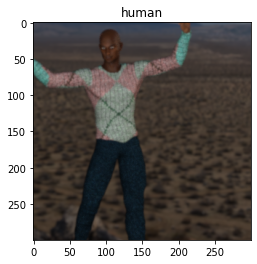

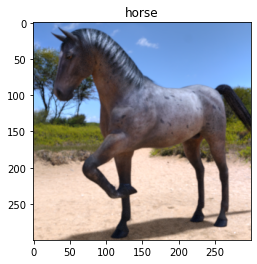

In [ ]:
from matplotlib import image as mpimg
import os
for link in os.listdir(train_path):
  lk=train_path+'/'+link
  for lk1 in os.listdir(lk+'/'):
    path=lk+'/'+lk1
    img=mpimg.imread(path)
    plt.imshow(img)
    plt.title(link[:-1])
    plt.show()
    break

In [ ]:
new_model=model.fit(train_set,
                    validation_data=test_set,
                    epochs=10,
                    verbose=2)

Epoch 1/10
33/33 - 58s - loss: 0.5500 - accuracy: 0.9591 - val_loss: 0.3819 - val_accuracy: 0.9688
Epoch 2/10
33/33 - 20s - loss: 0.0634 - accuracy: 0.9951 - val_loss: 0.0259 - val_accuracy: 0.9961
Epoch 3/10
33/33 - 19s - loss: 0.1441 - accuracy: 0.9922 - val_loss: 2.1420e-08 - val_accuracy: 1.0000
Epoch 4/10
33/33 - 19s - loss: 0.0485 - accuracy: 0.9971 - val_loss: 0.0336 - val_accuracy: 0.9961
Epoch 5/10
33/33 - 19s - loss: 0.0559 - accuracy: 0.9961 - val_loss: 0.1986 - val_accuracy: 0.9883
Epoch 6/10
33/33 - 19s - loss: 0.0403 - accuracy: 0.9981 - val_loss: 0.3016 - val_accuracy: 0.9844
Epoch 7/10
33/33 - 19s - loss: 0.0321 - accuracy: 0.9990 - val_loss: 0.1271 - val_accuracy: 0.9922
Epoch 8/10
33/33 - 19s - loss: 0.0557 - accuracy: 0.9981 - val_loss: 0.0460 - val_accuracy: 0.9961
Epoch 9/10
33/33 - 19s - loss: 0.1672 - accuracy: 0.9951 - val_loss: 0.3921 - val_accuracy: 0.9922
Epoch 10/10
33/33 - 19s - loss: 0.0377 - accuracy: 0.9971 - val_loss: 0.8412 - val_accuracy: 0.9727


In [ ]:
model.save("major pro 1.hdf5")

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 4.0MB/s 
     |████████████████████████████████| 81kB 8.6MB/s 
     |████████████████████████████████| 163kB 43.0MB/s 
     |████████████████████████████████| 112kB 44.3MB/s 
     |████████████████████████████████| 4.2MB 29.9MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
     |████████████████████████████████| 122kB 45.2MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.


In [ ]:
%%writefile app.py
from tensorflow import keras
import streamlit as st
from keras.models import load_model
from keras.applications.vgg19 import VGG19
from skimage.transform import resize
import numpy as np
from PIL import Image # Strreamlit works with PIL library very easily for Images
import cv2
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
st.title("horse or Human Image - CLassifier")
upload = st.file_uploader('Upload the image')

#load model
model_new=keras.models.load_model('/content/model_new.h5')

# predict
if upload is not None:
  file_bytes = np.asarray(bytearray(upload.read()), dtype=np.uint8)
  opencv_image = cv2.imdecode(file_bytes, 1)
  opencv_image = cv2.cvtColor(opencv_image,cv2.COLOR_BGR2RGB) # Color from BGR to RGB
  img = Image.open(upload)
  st.image(img,caption='Uploaded Image',width=300)
if st.button('PREDICT'):
  model = model_new
  x = cv2.resize(opencv_image,(224,224))
  x = np.expand_dims(x,axis=0)
  x = preprocess_input(x)
  y = model.predict(x)
  if y[0][0]==1:
    st.title('The predicted output is : Horse')
  else:
    st.title('The predicted output is : Human')

Writing app.py


In [ ]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://0432ccdc8a56.ngrok.io'